<a href="https://colab.research.google.com/github/JaiswalFelipe/ITNPAI1_Assignment/blob/main/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image denoising is a fundamental image processing problem and the basis for a pre-processing stepfor many advanced computer vision tasks. 


### 1. To write codes (must be well commented) with the following denoising methods (You can make use of any library you want). [15]
  
  a. Mean filter
  
  b. Median filter
  
  c. Wavelet
  
  d. Deep learning (you are free to choose any pre-trained model you want – but you need
to justify why did you select this model). You are not expected to train a new model
for this part.


The input to your code will be original and noisy images. The output will be denoised images.

REF: https://www.google.com/search?rlz=1C1GCEV_enGB998GB998&sxsrf=APq-WBvVt1twjPRnJpr3W_Z-QtV__lSWYw:1648318655939&q=how+do+you+determine+the+right+kernel+size+in+image+filtering&spell=1&sa=X&ved=2ahUKEwjS0Nq_seT2AhUOgFwKHeIQAv8QBSgAegQIARA3&biw=1280&bih=609&dpr=1.5

In [ ]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# Adjust figure sizes
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 100 

In [ ]:
# specify the img directory path
path_noisy10 = "/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/noisy10"
path_noisy25 = "/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/noisy25"
path_noisy50 = "/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/noisy50"
path_original = "/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/original"

# list files in img directory
noisy_10 = os.listdir(path_noisy10)
noisy_25 = os.listdir(path_noisy25)
noisy_50 = os.listdir(path_noisy50)
origninal = os.listdir(path_original)

In [ ]:
# Checking sample img shape 
img2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/noisy10/0000.png")
print(img2.shape)

(321, 481, 3)


##### Mean Filter

In [ ]:
# Mean filter
def mean_filter(input_list, path):
  
  denoised_imgs = []
  for i in input_list:
    img = cv2.imread(os.path.join(path,i))
    filtered_img = cv2.blur(img,(5,5)) # Mean filter with 3x3 kernel
    denoised_imgs.append(filtered_img)

  return denoised_imgs

In [ ]:
# Storing mean filtered images into separate variables for each folder

mean_filtered10 = mean_filter(noisy_10, path_noisy10)      # noisy10 folder
#mean_filtered25 = mean_filter(noisy_25, path_noisy25)     # noisy25 folder
#mean_filtered50 = mean_filter(noisy_50, path_noisy50)     # noisy50 folder

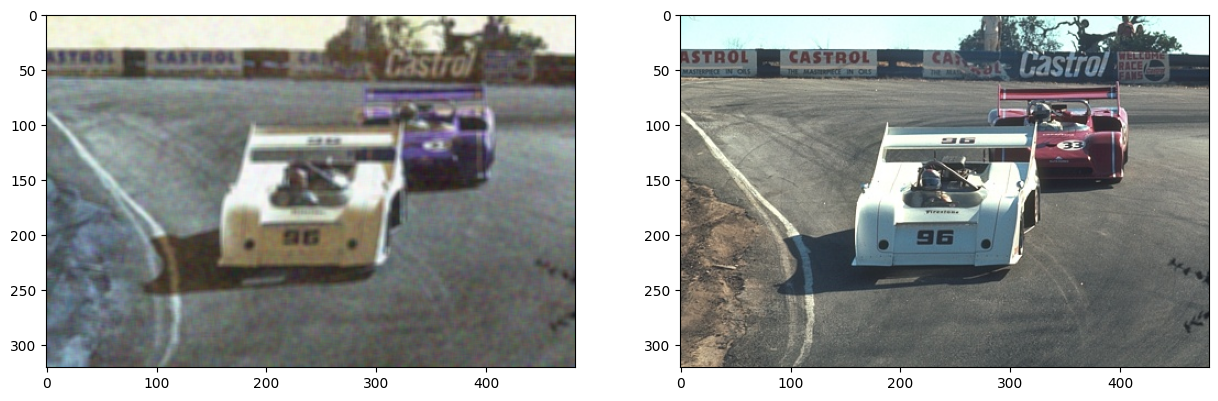

In [ ]:
# Comparing the filtered and original image side by side visually

# Loading an original img, remember to match the imgs correctly
origninal_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/original/0005.png")

# Plot
f, axarr = plt.subplots(1,2)
axarr[0].imshow(mean_filtered10[5])
#axarr[0].imshow(mean_filtered25[5])
#axarr[0].imshow(mean_filtered50[5])
axarr[1].imshow(cv2.cvtColor(origninal_img, cv2.COLOR_BGR2RGB))

##### Median Filter

In [ ]:
# Median filter
def median_filter(input_list, path):
  
  denoised_imgs = []
  for i in input_list:
    img = cv2.imread(os.path.join(path,i))
    filtered_img = cv2.medianBlur(img,5) # Median filter with 5x5 kernel
    denoised_imgs.append(filtered_img)

  return denoised_imgs

In [ ]:
# Storing mean filtered images into separate variables for each folder

#median_filter10 = median_filter(noisy_10, path_noisy10)      # noisy10 folder
median_filter25 = median_filter(noisy_25, path_noisy25)     # noisy25 folder
#median_filter50 = median_filter(noisy_50, path_noisy50)     # noisy50 folder

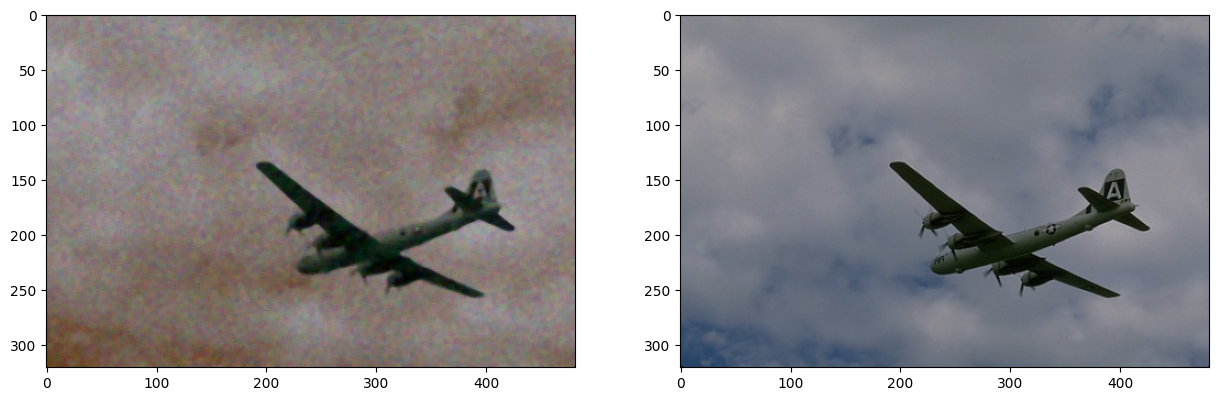

In [ ]:
# Comparing the filtered and original image side by side visually

# Loading an original img, remember to match the imgs correctly
origninal_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/original/0000.png")

# Plot
f, axarr = plt.subplots(1,2)
#axarr[0].imshow(median_filter10[0])
axarr[0].imshow(median_filter25[0])
#axarr[0].imshow(median_filter50[0])
axarr[1].imshow(cv2.cvtColor(origninal_img, cv2.COLOR_BGR2RGB))

##### Wavelet

In [ ]:
from skimage.restoration import denoise_wavelet
import skimage.io

# Median filter
def wavelet_transform(input_list, path):
  
  denoised_imgs = []
  for i in input_list:
    img = skimage.io.imread(os.path.join(path,i)) # Read img
    img = skimage.img_as_float(img)
    filtered_img = denoise_wavelet(img, method='BayesShrink', mode ='soft', 
                                   wavelet_levels=3, wavelet='coif5',
                                   multichannel = True, convert2ycbcr= True,
                                   rescale_sigma= True)
    denoised_imgs.append(filtered_img)

  return denoised_imgs

In [ ]:
# Storing mean filtered images into separate variables for each folder

#wavelet_transform10 = wavelet_transform(noisy_10, path_noisy10)      # noisy10 folder
#wavelet_transform25 = wavelet_transform(noisy_25, path_noisy25)     # noisy25 folder
wavelet_transform50 = wavelet_transform(noisy_50, path_noisy50)     # noisy50 folder

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


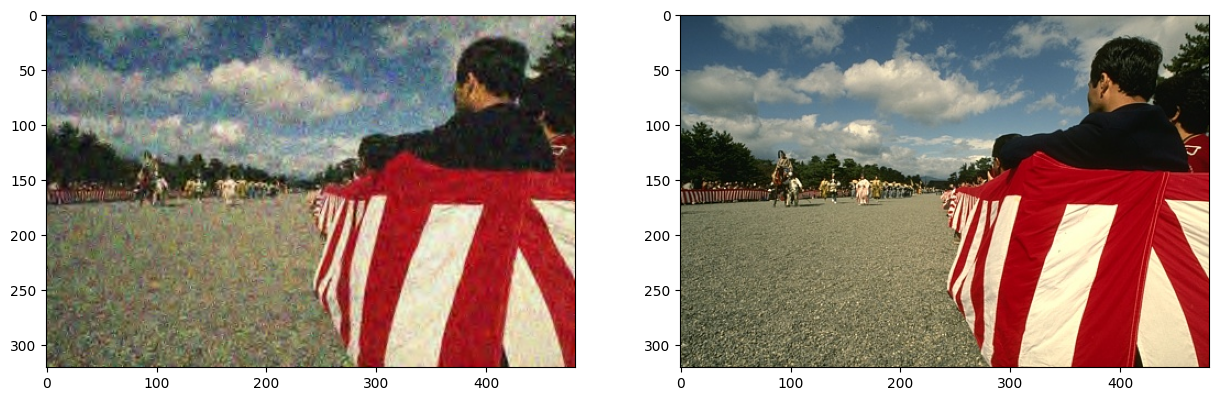

In [ ]:
# Comparing the filtered and original image side by side visually

# Loading an original img, remember to match the imgs correctly
origninal_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/University Of Stirling/Deep Learning for  Vision & NLP: ITNPAI1/ITNPAI1_Assignment/Task-A-Dataset-denoising/original/0024.png")

# Plot
f, axarr = plt.subplots(1,2)
#axarr[0].imshow(wavelet_transform10[24])
#axarr[0].imshow(wavelet_transform25[24])
axarr[0].imshow(wavelet_transform50[24])
axarr[1].imshow(cv2.cvtColor(origninal_img, cv2.COLOR_BGR2RGB))

##### Deep learning

In [ ]:
!pip install d2l==0.16.2 

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

import skimage.io

In [ ]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from PIL import Image


# load model and specify a new input shape for images and avg pooling output
new_input = tf.keras.Input(shape=(321, 481, 3))

model = VGG16(include_top=False, input_tensor=new_input, pooling='avg')
model.summary()

In [ ]:
def prep_data(input_list, path):
  data = []
  for i in input_list:
    img = load_img(os.path.join(path,i),target_size=(321, 481, 3)) #,target_size=(224, 224, 3)
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    data.append(img)

  return data





In [ ]:
noisy_data10 = prep_data(noisy_10, path_noisy10)
#original_data = prep_data(origninal,path_original)

In [ ]:
noisy_data10[0].shape

(1, 321, 481, 3)

In [ ]:
test = []
for img in noisy_data10:
  denoised_img = model.predict(img)
  
  #denoised_img = denoised_img.reshape(321, 481, 3)
  #denoised_img= tf.keras.preprocessing.image.array_to_img(denoised_img)
  test.append(denoised_img)

In [ ]:
test[1].shape

(1, 512)

In [73]:
#testting = test[1].reshape((img.shape[0], img.shape[1], img.shape[2]))
#testting.shape
testting = test[1].reshape((test[1].shape[0], test[1].shape[1], 3))
#test2 =  tf.keras.preprocessing.array_to_img(test[1], scale=False).resize((im_h,im_h))

ValueError: ignored

In [ ]:
imshow(wavelet_transform50[24])